<a href="https://colab.research.google.com/github/hersan19/ENC2022-PI-GP/blob/main/Copia_deDAVID_tutorial_ENC_PG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibiliotecas a utilizar
Se instalan bibliotecas que se utilizarán para el ejercicio. 

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install deap
!pip install kornia

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Bibliotecas
Se importan las bibliotecas a utilzar para el manejo de imágenes, clasificadores y programación genética 

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import kornia as K
#Bibliotecas para gráficos
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
# Bibliotecas para el procesamiento de imágenes
import numpy as np 
import skimage
import pandas as pd 
# Bibliotecas para el cómputo evolutivo
import operator 
import math
import random
from deap import base, creator, tools, gp
#Bilbiotecas para datasets
from imblearn.under_sampling import RandomUnderSampler
#Bibliotecas para clasificadores
import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import torch.nn.functional as F
import torch.nn as nn
#Bibliotecas para gp
import networkx as nx
import function_set as fs
from deap import algorithms


from collections import Counter

# Conjuntos de datos
Se agregan los conjuntos de datos a utilizar. CIFAR-10 y MNIST.

In [ ]:
#Función para descargar el conjunto de datos en formato tensor
def get_data_tensor(dataset):
  transform = transforms.Compose(
    [transforms.ToTensor(),
    #  transforms.Grayscale(1),
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     #transforms.Normalize((0.5,), (0.5,), (0.5))
     ])
  
  data = {}
  
  #CIFAR-10 (50,000 train + 10,000 test)
  if dataset == 'CIFAR-10':
    batch_size = 50000
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=False, num_workers=2)
    dataiter = iter(trainloader)
    images_train, labels_train = dataiter.next() 
    
    batch_size = 10000
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    dataiter = iter(testloader)
    images_test, labels_test = dataiter.next()

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
  
  #MNIST (60,000 train + 10,000 test)
  elif dataset == 'MNIST':
    batch_size = 60000
    trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=False, num_workers=2)
    dataiter = iter(trainloader)
    images_train, labels_train = dataiter.next() 
    
    batch_size = 10000
    testset = torchvision.datasets.MNIST(root='./data', train=False,
                                          download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    dataiter = iter(testloader)
    images_test, labels_test = dataiter.next()
 
    classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
  
  elif dataset == 'SVHN':
    batch_size = 60000
    trainset = torchvision.datasets.SVHN(root='./data', split="train",
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=False, num_workers=2)
    dataiter = iter(trainloader)
    images_train, labels_train = dataiter.next() 
    
    batch_size = 10000
    testset = torchvision.datasets.SVHN(root='./data', split="test",
                                          download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    dataiter = iter(testloader)
    images_test, labels_test = dataiter.next()
 
    classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
  
  #FMNIST (60,000 train + 10,000 test)
  elif dataset == "FMNIST":
    batch_size = 60000
    trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=False, num_workers=2)
    dataiter = iter(trainloader)
    images_train, labels_train = dataiter.next()
    
    batch_size = 10000
    testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                          download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    dataiter = iter(testloader)
    images_test, labels_test = dataiter.next()

    classes = ('t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot')

  data["train_images"] = images_train
  data["train_labels"] = labels_train
    
  data["test_images"] = images_test
  data["test_labels"] = labels_test

  return data, classes

In [ ]:
#Obtiene datos en formato tensor
# data, classes = get_data_tensor('SVHN')
# data, classes = get_data_tensor('MNIST')
data, classes = get_data_tensor('FMNIST')

train_images = data["train_images"]
train_labels = data["train_labels"]

test_images = data["test_images"]
test_labels = data["test_labels"]

In [ ]:
#Función para obtener un conjunto de datos balanceado en clases
def get_data_balanced(images, labels, no_examples_per_class):
  #Conforma vector de píxeles
  images_t = images.flatten(start_dim=1)

  #Genera diccionarcio
  def mk_dict_balance(no_examples, no_classes):
    dic={}
    for i in range(no_classes):
      dic[i]=no_examples
    return dic
  
  #A partir de un vector devuelve una imagen de tamaño "size como tupla"
  def vector2img(vector, size):
    ch=3 if vector.shape[1]%3==0 else 1
    return vector.view(len(vector), ch, size[0], size[1])

  #Genera dataset balanceado
  balanced = mk_dict_balance(no_examples_per_class, 10)
  under_sampler = RandomUnderSampler(random_state=42, sampling_strategy=balanced)#"auto"
  X_res, y_res = under_sampler.fit_resample(images_t, labels)
  #print(Counter(y_res))

  #Recupera formato de tensor [B C H W]
  size = (images.shape[2], images.shape[3])
  images_balanced = vector2img(torch.from_numpy(X_res), size)
  labels_balanced = torch.from_numpy(y_res)

  return images_balanced, labels_balanced

In [ ]:
#Obtiene un dataset balanceado: 80 imágenes por clase para entrenamiento y 20 por clase para prueba
train_images, train_labels = get_data_balanced(train_images, train_labels, 80)
test_images, test_labels = get_data_balanced(test_images, test_labels, 20)

# Muestra imágenes
Se crea una función que permite visualizar los datos almacenados en el tensor *train_images*

In [ ]:
#Funciones para mostrar una imagen
def vector2img(vector, size):
  ch=3 if vector.shape[1]%3==0 else 1
  return vector.view(len(vector), ch, size[0], size[1])

def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Tomamos 40 imágenes del conjunto de entrenamiento y las mostramos en un *grid* de 5 x 8

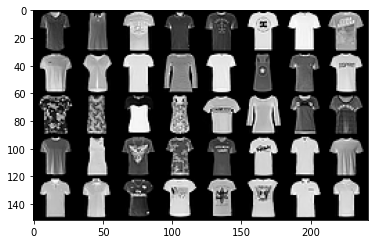

In [ ]:
grid = torchvision.utils.make_grid(train_images[:40], nrow = 8, padding = 2)
imshow(grid)

Muestra una sola imagen

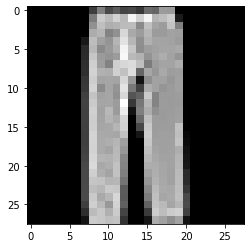

trouser


In [ ]:
# Muestra un ejemplo de la imagen que compone el conjunto de datos
idx=100
grid=torchvision.utils.make_grid(train_images[idx,:,:,:])
imshow(grid)
print(classes[train_labels[idx]])

# Funciones morfológicas
La biblioteca Kornia ofrece un conjunto de funciones y operaciones para resolver problemas de visión por computadora, redes neuronales con soporte para el cómputo en tarjetas gráficas.
Para más información: https://github.com/kornia/kornia

Las funciones consideradas se encuentran en el archivo "function_set.py". Se compone por las siguientes funciones.

*   Funciones morfológicas
>* Erosión
>* Dilatación
>* Apertura o *Opening*
>* Cierre o *Closing*
*   Detección de bordes
>* Sobel
>* LaPlaciano
>* Gradiente
*   Funciones aritméticas
>* Suma (2 o 3 imágenes)
>* Raíz cuadrada
*   Filtrado y transformaciones de intensidad
>* Ecualización de histograma
>* Ajuste de brillo
>* Gaussiano

Se muestra a continuación el efecto que se tiene al aplicar dichas funciones.


## Funciones morfológicas
Selecciona un conjunto de imágenes del conjunto de entrenamieto almacenado en el tensor con dimensiones [B, C, H, W], donde B se refiere al tamaño del lote, C al número de canales, H y W a la altura y ancho de las imágenes, respectivamente.

In [ ]:
images = train_images.clone()

Se aplican las funciones morfológicas

In [ ]:
images_ero = fs.Erosion(images)
images_dil = fs.Dilation(images)
images_ope = fs.Opening(images)
images_clo = fs.Closing(images)

y se muestra el efecto de aplicar las funciones morfológicas a un conjunto de imágenes en particular:

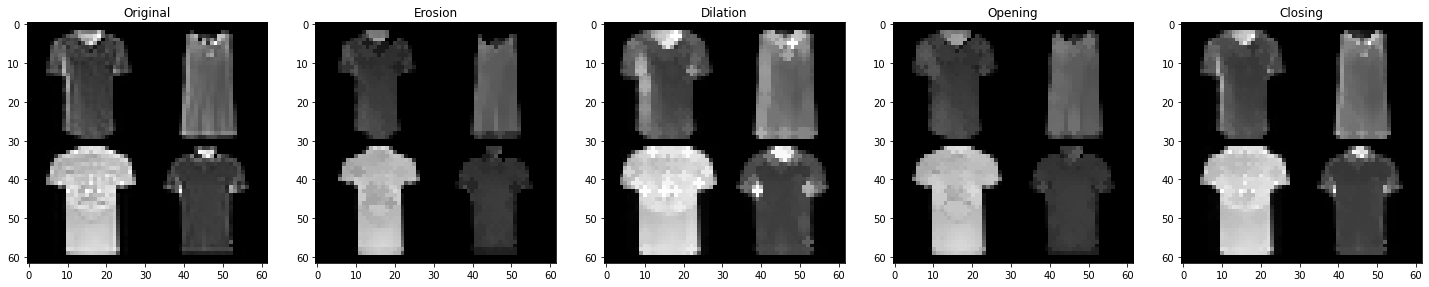

In [ ]:
# idx=50
morphologicals = [images_ero, images_dil, images_ope, images_clo]
# grids=[torchvision.utils.make_grid(morph[idx,:,:,:]) for morph in morphologicals]
grids=[torchvision.utils.make_grid(morph[:4], nrow = 2, padding = 2) for morph in morphologicals]
# grids.insert(0, torchvision.utils.make_grid(images[idx,:,:,:]))
grids.insert(0, torchvision.utils.make_grid(images[:4], nrow = 2, padding = 2))
grids=[np.transpose(grid.numpy(), (1,2,0)) for grid in grids]
titles=['Original', 'Erosion', 'Dilation', 'Opening', 'Closing']

f = plt.figure(figsize=(25,25))
for i in range(len(titles)):
  f.add_subplot(1, len(titles), i+1)
  plt.title(titles[i])
  plt.imshow(grids[i])

## Funciones de detección de bordes
Se aplican las funciones de detección de bordes: Sobel, LaPlaciano y Gradiente al conjunto de imágenes

In [ ]:
images_sobel = fs.Sobel(images)
images_lapl = fs.LaPlacian(images)
images_grad = fs.Gradient(images)

Nuevamente, se muestra el efecto de aplicar dichas funciones al conjunto de datos

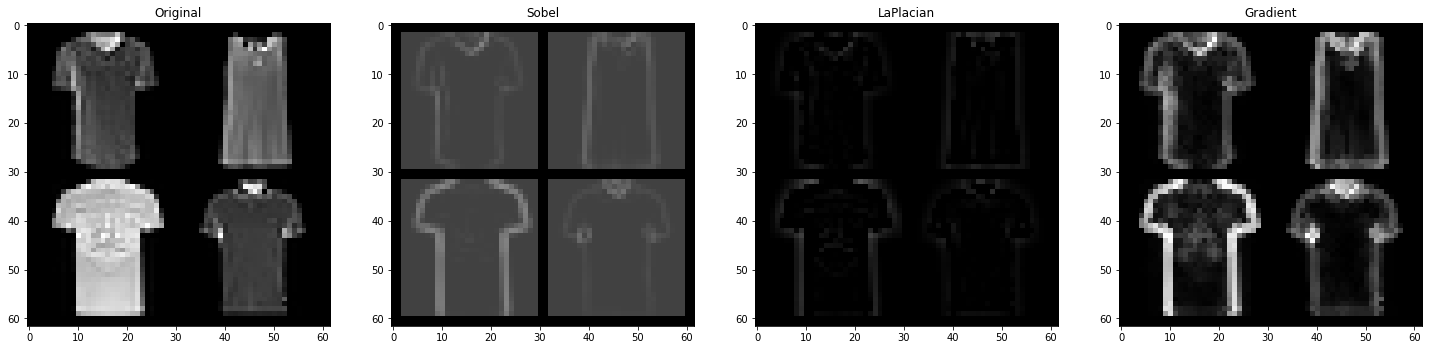

In [ ]:
edges = [images_sobel, images_lapl, images_grad]
grids=[torchvision.utils.make_grid(edge[:4], nrow = 2, padding = 2) for edge in edges]
grids.insert(0, torchvision.utils.make_grid(images[:4], nrow = 2, padding = 2))
grids=[np.transpose(grid.numpy(), (1,2,0)) for grid in grids]
titles=['Original', 'Sobel', 'LaPlacian', 'Gradient']

f = plt.figure(figsize=(25,25))
for i in range(len(titles)):
  f.add_subplot(1, len(titles), i+1)
  plt.title(titles[i])
  plt.imshow(grids[i])

## Funciones Aritméticas
Se aplican las funciones artiméticas a un conjunto de imágenes. Se considera la función suma con de aridad 2 y 3 y raíz cuadrada

In [ ]:
input1 = fs.Erosion(images)
input2 = fs.Opening(images)
input3 = fs.Sobel(images)
images_add2 = fs.suma_imgs2(input1, input2)
images_add3 = fs.suma_imgs3(input1, input2, input3)
images_sqrt = fs.sqrt(input1)

Se muestra el efecto de sumar 2 y 3 imágenes distintas entre sí. Para cada función, el conjunto de imágenes se ha dividido en 2 y 3 subconjuntos, respectivamente.

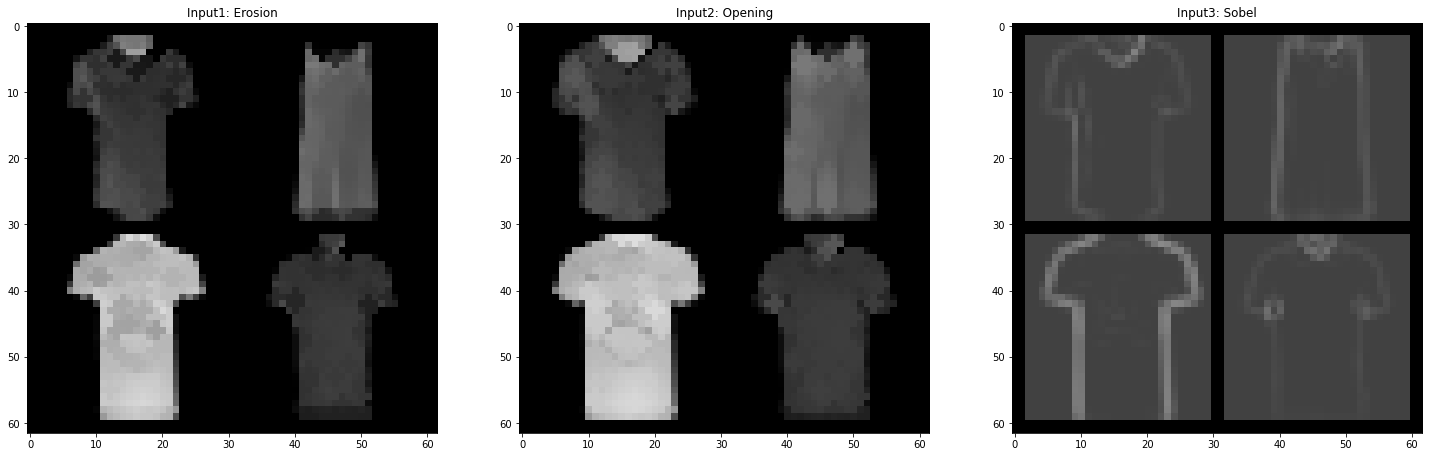

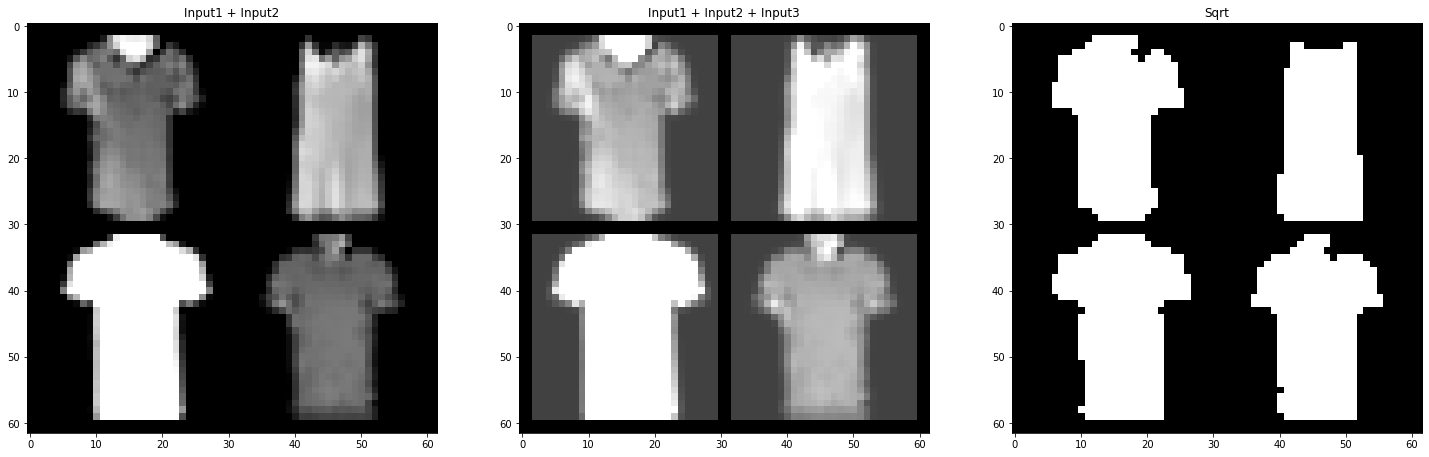

In [ ]:
inputs=[input1, input2, input3]
arithms = [images_add2, images_add3, images_sqrt]
grids_inp=[torchvision.utils.make_grid(inp[:4], nrow = 2, padding = 2) for inp in inputs]
grids=[torchvision.utils.make_grid(arithm[:4], nrow = 2, padding = 2) for arithm in arithms]

# grids.insert(0, torchvision.utils.make_grid(images[:4], nrow = 2, padding = 2))
grids_inp=[np.transpose(inp.numpy(), (1,2,0)) for inp in grids_inp]
grids=[np.transpose(grid.numpy(), (1,2,0)) for grid in grids]
titles_inp=['Input1: Erosion','Input2: Opening','Input3: Sobel']
titles=['Input1 + Input2', 'Input1 + Input2 + Input3', 'Sqrt(Input1)']

f = plt.figure(figsize=(25,25))
for i in range(len(titles)):
  f.add_subplot(1, len(titles), i+1)
  plt.title(titles_inp[i])
  plt.imshow(grids_inp[i])

f2 = plt.figure(figsize=(25,25))
for i in range(len(titles)):
  f2.add_subplot(1, len(titles), i+1)
  plt.title(titles[i])
  plt.imshow(grids[i])


# Clasificadores
Se generan los clasificadores a utilizar: K-NN, Árbol de decisión, Máquina de soporte vectorial, Multiperceptron

In [ ]:
#Clasificador MultiPerceptron Pytorch
class MLP(nn.Module):
  def __init__(self, in_channels, hidden_channels, 
               no_epochs, lr):
    super(MLP, self).__init__()

    self.mlp = torchvision.ops.MLP(in_channels, hidden_channels, activation_layer=torch.nn.ReLU)

    # self.fc1 = nn.Linear(tam_entrada,tam_oculta1)                  
    # self.fc2 = nn.Linear(tam_oculta1, tam_oculta2)
    # self.fc3 = nn.Linear(tam_oculta2, tam_oculta3)                  
    # self.out = nn.Linear(tam_oculta3, tam_salida)

    self.no_epochs=no_epochs
    self.lr=lr

  def forward(self, x):
    x = self.mlp(x)
    # x = F.relu(self.fc1(x))
    # x = F.relu(self.fc2(x))
    # x = F.relu(self.fc3(x))
    # x = self.out(x)
    return x

In [ ]:
#Clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

names = [
    "KNN",
    "Decision Tree",
    "MLP",
    "SVM"
]

classifiers = [
    KNeighborsClassifier(1),
    DecisionTreeClassifier(max_depth=5),
    # MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',
    #               solver='adam', alpha=1, batch_size=10,
    #               learning_rate='constant', learning_rate_init=0.001,
    #               max_iter=1000),
    MLP(784,[1000,100,10],
        no_epochs=200, lr=0.01),
    SVC(kernel="rbf")
]

clfs_names=dict(zip(names,classifiers))

In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

(torch.Size([800, 1, 28, 28]),
 torch.Size([800]),
 torch.Size([200, 1, 28, 28]),
 torch.Size([200]))

# Programación Genética
Se agrega el conjunto de funciones y terminales

In [ ]:
#Conjunto de funciones
pset = gp.PrimitiveSet("main", 1)
pset.addPrimitive(fs.Erosion, 1, "ero")
pset.addPrimitive(fs.Dilation, 1, "dil")
pset.addPrimitive(fs.Closing, 1, "clo")
pset.addPrimitive(fs.Opening, 1, "op")
pset.addPrimitive(fs.Gradient, 1, "grad")
# pset.addPrimitive(fs.Gaussian_blur_2d, 1, "g_blur")
pset.addPrimitive(fs.En_adbright, 1, "bright")
pset.addPrimitive(fs.En_equal, 1, "h_eq")
pset.addPrimitive(fs.suma_imgs2, 2, "sum2")
pset.addPrimitive(fs.suma_imgs3, 3, "sum3")
# pset.addPrimitive(fs.resta_imgs, 2, "sub")
pset.addPrimitive(fs.sqrt,1,"sqrt")
pset.addPrimitive(fs.Sobel, 1, "sobel")
pset.addPrimitive(fs.LaPlacian, 1, "laplace")

#Conjunto de terminales
pset.renameArguments(ARG0='img')

In [ ]:
#Función para graficar/visualizar el árbol
def plt_ind(ind):
    tree=gp.PrimitiveTree(ind)
    nodes, edges, labels = gp.graph(tree)
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    
    pos = nx.nx_agraph.graphviz_layout(g, prog="dot")
    
    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos, labels)
    plt.axis('off')
    plt.show()
    return

Función de evaluación

In [ ]:
def train(clf, inputs, labels):
  if isinstance(clf, (KNeighborsClassifier, MLPClassifier, DecisionTreeClassifier, SVC)):
    inputs = inputs.to("cpu")
    labels = labels.to("cpu")
    clf.fit(inputs, labels)

  elif isinstance(clf, nn.Module):
    #Optimizador y función de costo para entrenar el modelo MLP
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(clf.parameters(), lr=clf.lr)

    # print(inputs.device, labels.device)
    # print("Train", torch.cuda.memory_allocated(), torch.cuda.memory_reserved())

    device = "cuda:0"
    clf = clf.to(device)
    clf.train()
    inputs = inputs.to(device)
    labels = labels.to(device)

    # print("Train", torch.cuda.memory_allocated(), torch.cuda.memory_reserved())

    losses = []
    for i in range(clf.no_epochs):
      preds = clf(inputs)
      # preds = preds.to(device)
      loss = loss_fn(preds.to(device), labels)
      losses.append(loss)
      # print(f'Epoca: {i:2}  loss: {loss.item():10.8f}')
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    # print(inputs.device, labels.device)
    # inputs = inputs.to("cpu")
    # labels = labels.to("cpu")
    # clf = clf.to("cpu")

    del preds
    # del inputs
    # del labels
    del optimizer
    torch.cuda.empty_cache()
    
    # print("Train", torch.cuda.memory_allocated(), torch.cuda.memory_reserved())

  return clf

def validate(clf, inputs, labels):
  if isinstance(clf, (KNeighborsClassifier, MLPClassifier, DecisionTreeClassifier, SVC)):
    inputs = inputs.to("cpu")
    labels = labels.to("cpu")
    return clf.score(inputs,labels)

  elif isinstance(clf, nn.Module):
    # clf.eval()
    predicciones=[]
    device = "cuda:0"
    with torch.no_grad():
      clf=clf.to(device)
      inputs=inputs.to(device)
      labels=labels.to(device)

      for val in inputs:
          pred = clf.forward(val)
          predicciones.append(pred.argmax().item())

    inputs = inputs.to("cpu")
    labels = labels.to("cpu")
    clf = clf.to("cpu")

    df = pd.DataFrame({'Label': labels, 'Pred': predicciones})
    df['Correcto'] = ["Si" if corr == predicciones else "No" for corr, predicciones in zip(df['Label'], df['Pred'])]
    
    predicciones=np.asarray(predicciones)
    labels = np.asarray(labels)
    matriz=confusion_matrix(labels,predicciones)
    score = accuracy_score(labels, predicciones)
    # print(matriz, score)

    del predicciones
    del inputs
    del labels
    torch.cuda.empty_cache()

    return score

def evaluate(ind, clf_name="Neural Net"):
  # global test_images
  # global train_images
  # global test_labels
  # global train_labels

  # #Muestra un ejemplo de imagen de entrada
  # idx = random.randint(0, test_images.shape[0])
  # imshow(torchvision.utils.make_grid(test_images[idx,:,:,:]))
  # print(classes[test_labels[idx]])
  # size = (test_images.shape[2],test_images.shape[3])

  function = toolbox.compile(ind)
  train_features = function(train_images)
  test_features = function(test_images)

  #Convierte cada imagen  del conjunto de entrenamiento y prueba en un vector de entradas al modelo
  train_features = train_features.flatten(start_dim=1)
  test_features = test_features.flatten(start_dim=1)

  #Selecciona el modelo de clasificación
  if clf_name=="KNN":
    clf = clfs_names[clf_name]
  elif clf_name=="Decision Tree":
    clf = clfs_names[clf_name]
  elif clf_name=="MLP":
    clf = clfs_names[clf_name]
  elif clf_name == "SVM":
    clf = clfs_names[clf_name]
  else:
    print("Clasificador no seleccionado")

  # print("Evaluation", torch.cuda.memory_allocated(), torch.cuda.memory_reserved())

  #Entrena modelo de clasificación
  clf = train(clf, train_features, train_labels)

  #Valida modelo de clasificación
  score = validate(clf, test_features, test_labels)

  #Muestra un ejemplo de característica extraída expresada por el árbol
  # imshow(torchvision.utils.make_grid(vector2img(test_features, size = size)[idx,:,:,:]))

  return score,

In [ ]:
#Toolbox de DEAP GP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=5, max_=12)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=2, max_=8)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# toolbox.register("evaluate", evaluate, clf_name="KNN")
# toolbox.register("evaluate", evaluate, clf_name="Decision Tree")
toolbox.register("evaluate", evaluate, clf_name="MLP")
# toolbox.register("evaluate", evaluate, clf_name="SVM")

Se visualiza un ejemplo de árbol generado por PG:

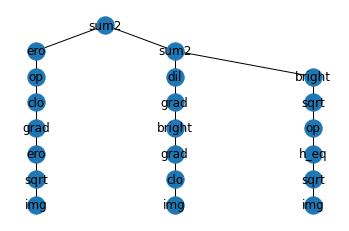

sum2(ero(op(clo(grad(ero(sqrt(img)))))), sum2(dil(grad(bright(grad(clo(img))))), bright(sqrt(op(h_eq(sqrt(img)))))))


(0.455,)

In [ ]:
ind=toolbox.individual()
plt_ind(ind)
print(str(ind))
fitness = evaluate(ind, clf_name = "MLP")
fitness

Se declaran las estadísticas para monitorear durante el proceso evolutivo

In [ ]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean)
mstats.register("std", np.std)
mstats.register("min", np.min)
mstats.register("max", np.max)

Parámetros del algoritmo evolutivo basado en PG

In [ ]:
no_individuals=10
population = toolbox.population(n=no_individuals)
halloffame = tools.HallOfFame(1)
verbose = True
ngen = 20
cxpb=0.9
mutpb=0.5
elitpb=0.2

Algoritmo con elitismo

In [ ]:
logbook = tools.Logbook()
logbook.header = ['gen', 'nevals'] + (mstats.fields if mstats else [])

# Evalúa los individuos que no tienen asignado el atributo "fitness"
invalid_ind = [ind for ind in population if not ind.fitness.valid]
fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
for ind, fit in zip(invalid_ind, fitnesses):
    ind.fitness.values = fit

#Se seleccionan los mejores individuos de la población para conservarlos en la siguiente generación
inds_elit = tools.selBest(population, int(elitpb*no_individuals))

if halloffame is not None:
    halloffame.update(population)

record = mstats.compile(population) if mstats else {}
logbook.record(gen=0, nevals=len(invalid_ind), **record)
if verbose:
    print(logbook.stream)

#Comienza proceso generacional
for gen in range(1, ngen + 1):
    # Selecciona los padres para generar la descendencia
    # offspring = toolbox.select(population, len(population))
    offspring = toolbox.select(population, len(population)-int(elitpb*no_individuals))

    # Se aplican los operadores de variación
    offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

    # Evalúa los individuos que no tienen asignado el atributo "fitness"
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Añade a la descendencia los individuos seleccionados por elitismo
    offspring = offspring + inds_elit

    # Actualiza salón de la fama con población generada
    if halloffame is not None:
        halloffame.update(offspring)

    # Remplaza la población con los individuos de la descendencia
    population[:] = offspring

    # population = population + offspring
    # population = tools.selBest(population, k=no_individuals)

    # Añade las estadísticas de la generación al objeto "Logbook"
    record = mstats.compile(population) if mstats else {}
    logbook.record(gen=gen, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)
    
    # Updtate elitism individuals
    inds_elit = tools.selBest(population, int(elitpb*no_individuals))
# return population, logbook

   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg  	gen	max  	min	nevals	std    	avg 	gen	max	min	nevals	std    
0  	10    	0.289	0  	0.685	0.1	10    	0.22328	36.4	0  	73 	11 	10    	19.7241
1  	4     	0.416	1  	0.735	0.1	4     	0.25196	22  	1  	42 	9  	4     	9.85901
2  	5     	0.458	2  	0.735	0.095	5     	0.25748	24.1	2  	42 	5  	5     	11.1036
3  	8     	0.5725	3  	0.76 	0.105	8     	0.244082	16.7	3  	32 	3  	8     	10.3058
4  	8     	0.629 	4  	0.76 	0.145	8     	0.207217	12.3	4  	34 	3  	8     	10.2669
5  	8     	0.2325	5  	0.76 	0.1  	8     	0.261278	10.7	5  	25 	3  	8     	9.03383
6  	7     	0.297 	6  	0.76 	0.1  	7     	0.300934	14.2	6  	54 	2  	7     	15.4324
7  	8     	0.232 	7  	0.76 	0.1  	8     	0.264   	15.6	7  	45 	3  	8     	15.1934
8  	7     	0.232 	8  	0.76 	0.1  	7     	0.264   	10  	8  	49 